In [1]:
#PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
#HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
#CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
#Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
#Destination - The planet the passenger will be debarking to.
#Age - The age of the passenger.
#VIP - Whether the passenger has paid for special VIP service during the voyage.
#RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
#Name - The first and last names of the passenger.
#Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

Importing libraries.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('D:/spaceship-titanic/train.csv')

In [4]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
#Checking for balanced or imbalanced dataset.

In [7]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [8]:
# Fixing the cabin column.

In [9]:
deck=[]
num=[]
side=[]
def cab(cabin):
    if pd.isna(cabin)==False:
        l= cabin.split('/')
        deck.append(l[0])
        num.append(float(l[1]))
        side.append(l[2])
    else:
        deck.append(cabin)
        num.append(cabin)
        side.append(cabin)
df['Cabin'].apply(cab)
df['deck']=deck
df['num']=num
df['side']=side
df['side'] = pd.get_dummies(df['side'],drop_first=True)
df.drop(['Cabin'],axis=1,inplace=True)

# Exploratory data analysis.

<AxesSubplot:title={'center':'Target distribution'}, ylabel='Transported'>

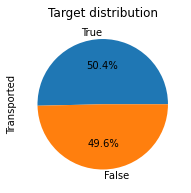

In [10]:
plt.figure(figsize=(5, 3))
df["Transported"].value_counts().plot(kind="pie", title="Target distribution", autopct="%1.1f%%")

Age distribution 

Text(0.5, 0, 'Age (years)')

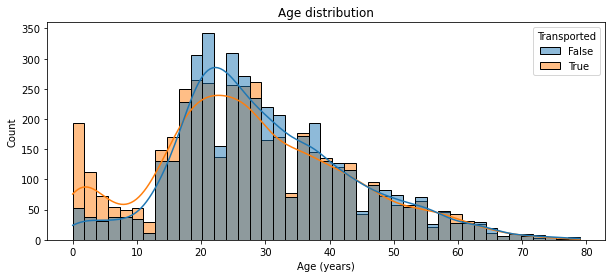

In [11]:
plt.figure(figsize=(10, 4))

sns.histplot(df, x=df["Age"],hue="Transported", kde=True)

# Aesthetics
plt.title("Age distribution")
plt.xlabel("Age (years)")


Correlation between variables

<AxesSubplot:>

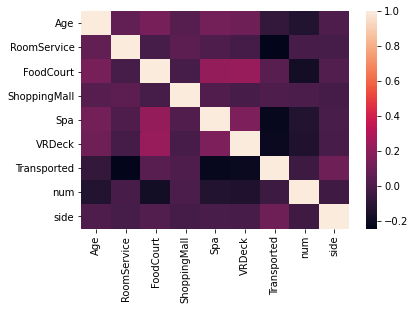

In [12]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

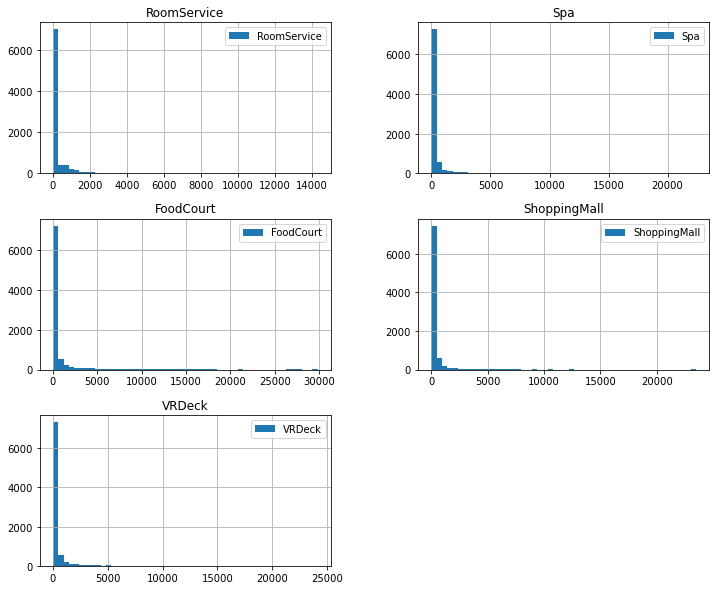

In [13]:
df[["RoomService", "Spa", "FoodCourt", "ShoppingMall", "VRDeck"]].hist(bins=50, figsize=(12, 10), legend=True)

plt.show()


Feature Engineering

Plotting missing values heatmap.

<AxesSubplot:>

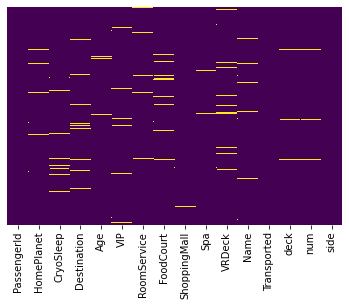

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
#Name is not a feature
df.drop('Name',axis=1,inplace=True)

In [16]:
df.drop('PassengerId',axis=1,inplace=True)

In [17]:
df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [18]:
feature_nan = ['Destination','CryoSleep','HomePlanet','deck']

In [19]:
for feature in feature_nan:
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)

In [20]:
df['Destination']=df['Destination'].fillna(value=df['Destination'].mode()[0])

In [21]:
df['CryoSleep']=df['CryoSleep'].fillna(value=df['CryoSleep'].mode()[0])

In [22]:
df['Age']=df['Age'].fillna(value=int(df['Age'].mean()))

In [23]:
#Since most of the values are from a single category.

In [24]:
'RoomService','ShoppingMall','FoodCourt','Spa','VRDeck','deck','HomePlanet'

('RoomService',
 'ShoppingMall',
 'FoodCourt',
 'Spa',
 'VRDeck',
 'deck',
 'HomePlanet')

In [25]:
df['ShoppingMall'].value_counts()

0.0       5587
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
2011.0       1
2778.0       1
239.0        1
2728.0       1
620.0        1
Name: ShoppingMall, Length: 1115, dtype: int64

In [26]:
df['RoomService']=df['RoomService'].fillna(value=df['RoomService'].median())

In [27]:
df['ShoppingMall']=df['ShoppingMall'].fillna(value=df['ShoppingMall'].median())

In [28]:
df['FoodCourt']=df['FoodCourt'].fillna(value=df['FoodCourt'].median())

In [29]:
df['Spa']=df['Spa'].fillna(value=df['Spa'].median())

In [30]:
df['VRDeck']=df['VRDeck'].fillna(value=df['VRDeck'].mode()[0])

In [31]:
df['deck']=df['deck'].fillna(value=df['deck'].mode()[0])

In [32]:
df['num']=df['num'].fillna(value=df['num'].median())

In [33]:
df['HomePlanet']=df['HomePlanet'].fillna(value=df['HomePlanet'].mode()[0])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      8693 non-null   object 
 1   CryoSleep       8693 non-null   bool   
 2   Destination     8693 non-null   object 
 3   Age             8693 non-null   float64
 4   VIP             8490 non-null   object 
 5   RoomService     8693 non-null   float64
 6   FoodCourt       8693 non-null   float64
 7   ShoppingMall    8693 non-null   float64
 8   Spa             8693 non-null   float64
 9   VRDeck          8693 non-null   float64
 10  Transported     8693 non-null   bool   
 11  deck            8693 non-null   object 
 12  num             8693 non-null   float64
 13  side            8693 non-null   uint8  
 14  Destinationnan  8693 non-null   int32  
 15  CryoSleepnan    8693 non-null   int32  
 16  HomePlanetnan   8693 non-null   int32  
 17  decknan         8693 non-null   i

##Handling Categorical features.




In [35]:
df.head(10)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side,Destinationnan,CryoSleepnan,HomePlanetnan,decknan
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,0,0,0,0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,1,0,0,0,0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,1,0,0,0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,1,0,0,0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1.0,1,0,0,0,0
5,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True,F,0.0,0,0,0,0,0
6,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True,F,2.0,1,0,0,0,0
7,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,True,G,0.0,1,0,0,0,0
8,Earth,False,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True,F,3.0,1,0,0,0,0
9,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True,B,1.0,0,0,0,0,0


In [36]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side,Destinationnan,CryoSleepnan,HomePlanetnan,decknan
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,0,0,0,0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,1,0,0,0,0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,1,0,0,0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,1,0,0,0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98.0,0,0,0,0,0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499.0,1,0,0,0,0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500.0,1,0,0,0,0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608.0,1,0,0,0,0


In [37]:
df['VIP'] = pd.get_dummies(df['VIP'],drop_first=True)
df['CryoSleep'] = pd.get_dummies(df['CryoSleep'],drop_first=True)
df1=pd.get_dummies(df['HomePlanet'],drop_first=True)
df2=pd.get_dummies(df['Destination'],drop_first=True)
df3=pd.get_dummies(df['deck'],drop_first=True)

In [38]:
df= pd.concat([df,df1,df2,df3],axis=1)

In [39]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Mars,PSO J318.5-22,TRAPPIST-1e,B,C,D,E,F,G,T
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,...,0,0,1,0,0,0,0,1,0,0
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,...,0,0,1,0,0,0,0,0,0,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,...,0,0,1,0,0,0,0,0,0,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,...,0,0,0,0,0,0,0,0,0,0
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,...,0,0,1,0,0,0,0,0,1,0
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,...,0,0,0,0,0,0,1,0,0,0


In [40]:
df.drop(['HomePlanet','Destination','deck'],axis=1,inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CryoSleep       8693 non-null   uint8  
 1   Age             8693 non-null   float64
 2   VIP             8693 non-null   uint8  
 3   RoomService     8693 non-null   float64
 4   FoodCourt       8693 non-null   float64
 5   ShoppingMall    8693 non-null   float64
 6   Spa             8693 non-null   float64
 7   VRDeck          8693 non-null   float64
 8   Transported     8693 non-null   bool   
 9   num             8693 non-null   float64
 10  side            8693 non-null   uint8  
 11  Destinationnan  8693 non-null   int32  
 12  CryoSleepnan    8693 non-null   int32  
 13  HomePlanetnan   8693 non-null   int32  
 14  decknan         8693 non-null   int32  
 15  Europa          8693 non-null   uint8  
 16  Mars            8693 non-null   uint8  
 17  PSO J318.5-22   8693 non-null   u

In [53]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.01)
var_thres.fit(X_train)

VarianceThreshold(threshold=0.01)

In [55]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(constant_columns)

['T']


In [56]:
X_train.drop(constant_columns,axis=1,inplace=True)

C:\Users\chand\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [57]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [58]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

0

In [42]:
from sklearn.model_selection import KFold

In [43]:
X= df.drop(['Transported'],axis=1)
y= df['Transported']

In [44]:
kf = KFold(n_splits=6)

In [45]:
for train_index, test_index in kf.split(X,y):
    X_train=X.iloc[train_index]
    X_test=X.iloc[test_index]
    y_train=y.iloc[train_index]
    y_test=y.iloc[test_index]

In [46]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in range(200,2000,200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score


In [48]:
kf =KFold(n_splits=5)
for train_index, test_index in kf.split(X,y):

    X_train=X.iloc[train_index]
    X_test=X.iloc[test_index]
    y_train=y.iloc[train_index]
    y_test=y.iloc[test_index]
    rf=RandomForestClassifier()
    rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    print(classification_report(y_test,pred))
    score=accuracy_score(pred,y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
              precision    recall  f1-score   support

       False       0.82      0.76      0.79       908
        True       0.76      0.82      0.79       831

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

Fitting 3 folds for each of 10 candidates, totalling 30 fits
              precision    recall  f1-score   support

       False       0.85      0.73      0.78       932
        True       0.73      0.85      0.78       807

    accuracy                           0.78      1739
   macro avg       0.79      0.79      0.78      1739
weighted avg       0.79      0.78      0.78      1739

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\chand\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

       False       0.76      0.84      0.80       778
        True       0.86      0.78      0.82       961

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.82      0.81      0.81      1739

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\chand\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

       False       0.77      0.85      0.81       786
        True       0.87      0.79      0.83       952

    accuracy                           0.82      1738
   macro avg       0.82      0.82      0.82      1738
weighted avg       0.83      0.82      0.82      1738

Fitting 3 folds for each of 10 candidates, totalling 30 fits
              precision    recall  f1-score   support

       False       0.84      0.77      0.80       911
        True       0.77      0.84      0.80       827

    accuracy                           0.80      1738
   macro avg       0.80      0.80      0.80      1738
weighted avg       0.80      0.80      0.80      1738



In [49]:
from xgboost import XGBClassifier

In [50]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}


In [51]:
kf =KFold(n_splits=5)
for train_index, test_index in kf.split(X,y):

    X_train=X.iloc[train_index]
    X_test=X.iloc[test_index]
    y_train=y.iloc[train_index]
    y_test=y.iloc[test_index]
    xg = XGBClassifier(random_state=123)
    xg = RandomizedSearchCV(estimator = xg, param_distributions = params, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    xg.fit(X_train, y_train)
    pred = rf.predict(X_test)
    print(classification_report(y_test,pred))
    score=accuracy_score(pred,y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\chand\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chand\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chand\anaconda3\lib\site-packages\xgboost\core.py", line 575, in inner_f
    return f(**kwargs)
  File "C:\Users\chand\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\chand\anaconda3\lib\site-packages\xgboost\core.py", line 575, i

              precision    recall  f1-score   support

       False       0.89      0.87      0.88       908
        True       0.86      0.88      0.87       831

    accuracy                           0.87      1739
   macro avg       0.87      0.87      0.87      1739
weighted avg       0.87      0.87      0.87      1739

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\chand\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chand\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chand\anaconda3\lib\site-packages\xgboost\core.py", line 575, in inner_f
    return f(**kwargs)
  File "C:\Users\chand\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\chand\anaconda3\lib\site-packages\xgboost\core.py", line 575, i

              precision    recall  f1-score   support

       False       0.90      0.87      0.89       932
        True       0.86      0.89      0.87       807

    accuracy                           0.88      1739
   macro avg       0.88      0.88      0.88      1739
weighted avg       0.88      0.88      0.88      1739

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\chand\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chand\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chand\anaconda3\lib\site-packages\xgboost\core.py", line 575, in inner_f
    return f(**kwargs)
  File "C:\Users\chand\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\chand\anaconda3\lib\site-packages\xgboost\core.py", line 575, i

              precision    recall  f1-score   support

       False       0.87      0.89      0.88       778
        True       0.91      0.89      0.90       961

    accuracy                           0.89      1739
   macro avg       0.89      0.89      0.89      1739
weighted avg       0.89      0.89      0.89      1739

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\chand\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chand\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chand\anaconda3\lib\site-packages\xgboost\core.py", line 575, in inner_f
    return f(**kwargs)
  File "C:\Users\chand\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\chand\anaconda3\lib\site-packages\xgboost\core.py", line 575, i

              precision    recall  f1-score   support

       False       0.88      0.89      0.89       786
        True       0.91      0.90      0.90       952

    accuracy                           0.90      1738
   macro avg       0.89      0.90      0.89      1738
weighted avg       0.90      0.90      0.90      1738

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\chand\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chand\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chand\anaconda3\lib\site-packages\xgboost\core.py", line 575, in inner_f
    return f(**kwargs)
  File "C:\Users\chand\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\chand\anaconda3\lib\site-packages\xgboost\core.py", line 575, i

[16:22:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

       False       0.84      0.77      0.80       911
        True       0.77      0.84      0.80       827

    accuracy                           0.80      1738
   macro avg       0.80      0.80      0.80      1738
weighted avg       0.80      0.80      0.80      1738



In [52]:
print('Best score:', xg.best_params_)


Best score: {'reg_lambda': 5, 'reg_alpha': 0.5, 'n_estimators': 500, 'learning_rate': 0.05, 'gamma': 0.5, 'booster': 'gblinear', 'base_score': 0.5}


In [83]:
test_data = pd.read_csv("D:/spaceship-titanic/test.csv")
test_data = test_data.drop(['Name'], axis=1)

In [84]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
dtypes: float64(6), object(6)
memory usage: 401.1+ KB


In [85]:
test_data.drop('PassengerId',axis=1,inplace=True)

In [86]:
deck=[]
num=[]
side=[]
def cab(cabin):
    if pd.isna(cabin)==False:
        l= cabin.split('/')
        deck.append(l[0])
        num.append(float(l[1]))
        side.append(l[2])
    else:
        deck.append(cabin)
        num.append(cabin)
        side.append(cabin)
test_data['Cabin'].apply(cab)
test_data['deck']=deck
test_data['num']=num
test_data['side']=side
test_data['side'] = pd.get_dummies(test_data['side'],drop_first=True)
test_data.drop(['Cabin'],axis=1,inplace=True)

In [87]:
feature_nan = ['Destination','CryoSleep','HomePlanet','deck']

In [88]:
for feature in feature_nan_with_mode:
    test_data[feature+'nan']=np.where(test_data[feature].isnull(),1,0)

In [89]:
test_data['Destination']=test_data['Destination'].fillna(value=test_data['Destination'].mode()[0])

In [90]:
test_data['CryoSleep']=test_data['CryoSleep'].fillna(value=test_data['CryoSleep'].mode()[0])

In [91]:
test_data['Age']=df['Age'].fillna(value=test_data['Age'].mean())

In [92]:
test_data['RoomService']=test_data['RoomService'].fillna(value=test_data['RoomService'].median())

In [93]:
test_data['ShoppingMall']=test_data['ShoppingMall'].fillna(value=test_data['ShoppingMall'].median())

In [94]:
test_data['FoodCourt']=test_data['FoodCourt'].fillna(value=test_data['FoodCourt'].median())

In [95]:
test_data['Spa']=test_data['Spa'].fillna(value=test_data['Spa'].median())

In [96]:
test_data['VRDeck']=test_data['VRDeck'].fillna(value=test_data['VRDeck'].mode()[0])

In [97]:
test_data['deck']=test_data['deck'].fillna(value=test_data['deck'].mode()[0])

In [98]:
test_data['num']=test_data['num'].fillna(value=test_data['num'].median())

In [99]:
test_data['HomePlanet']=test_data['HomePlanet'].fillna(value=test_data['HomePlanet'].mode()[0])

In [100]:
test_data['VIP'] = pd.get_dummies(test_data['VIP'],drop_first=True)
test_data['CryoSleep'] = pd.get_dummies(test_data['CryoSleep'],drop_first=True)
df1=pd.get_dummies(test_data['HomePlanet'],drop_first=True)
df2=pd.get_dummies(test_data['Destination'],drop_first=True)
df3=pd.get_dummies(test_data['deck'],drop_first=True)

In [101]:
test_data= pd.concat([test_data,df1,df2,df3],axis=1)

In [102]:
test_data.drop(['HomePlanet','Destination','deck'],axis=1,inplace=True)

In [103]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryoSleep        4277 non-null   uint8  
 1   Age              4277 non-null   float64
 2   VIP              4277 non-null   uint8  
 3   RoomService      4277 non-null   float64
 4   FoodCourt        4277 non-null   float64
 5   ShoppingMall     4277 non-null   float64
 6   Spa              4277 non-null   float64
 7   VRDeck           4277 non-null   float64
 8   num              4277 non-null   float64
 9   side             4277 non-null   uint8  
 10  Agenan           4277 non-null   int32  
 11  RoomServicenan   4277 non-null   int32  
 12  ShoppingMallnan  4277 non-null   int32  
 13  FoodCourtnan     4277 non-null   int32  
 14  Spanan           4277 non-null   int32  
 15  VRDecknan        4277 non-null   int32  
 16  decknan          4277 non-null   int32  
 17  Europa        

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryoSleep        8693 non-null   uint8  
 1   Age              8693 non-null   float64
 2   VIP              8693 non-null   uint8  
 3   RoomService      8693 non-null   float64
 4   FoodCourt        8693 non-null   float64
 5   ShoppingMall     8693 non-null   float64
 6   Spa              8693 non-null   float64
 7   VRDeck           8693 non-null   float64
 8   Transported      8693 non-null   bool   
 9   num              8693 non-null   float64
 10  side             8693 non-null   uint8  
 11  Agenan           8693 non-null   int32  
 12  RoomServicenan   8693 non-null   int32  
 13  ShoppingMallnan  8693 non-null   int32  
 14  FoodCourtnan     8693 non-null   int32  
 15  Spanan           8693 non-null   int32  
 16  VRDecknan        8693 non-null   int32  
 17  decknan       

In [105]:
for x in df.columns:
    if x not in test_data.columns:
        print(x)

Transported
Destinationnan
CryoSleepnan
HomePlanetnan


In [73]:
sample_submission= pd.read_csv("D:/spaceship-titanic/sample_submission.csv")

In [74]:
len(sample_submission['Transported'])

4277

In [75]:
sample_submission.Transported=test_pred_LR
LR_results=sample_submission
print(LR_results)

     PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]


In [76]:
LR_results.to_csv("D:/spaceship-titanic/my746.csv", index=False)
LR_results.head(28)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,False
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,True
